# Problème : Gestion de tournées de livraison

Données : Un graphe complet G arêtes-valué, une liste de sommet L, un entier k

Question : Existe-t-il un cycle passant au moins une fois par chaque sommets de la liste dans G et dont la sommet des valeurs des arrêtes est au plus k ?

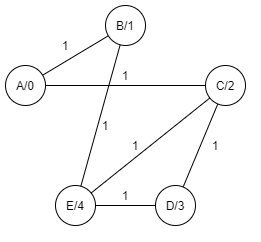
Graphe d'exemple pour le problème Gestion de tournées de livraison

In [5]:
V = (0, 1, 2, 3, 4)
E = (
    (0, 1, 1, 0, 0),
    (1, 0, 0, 0, 1),
    (1, 0, 0, 1, 1),
    (0, 0, 1, 0, 1),
    (0, 1, 1, 1, 0),
)
L = (0, 1, 2, 3, 4)
Cycle = (0, 1, 4, 3, 2, 0)

Nous allons ici cherché à déterminer si le problème __Gestion de tournées de livraison__ si trouve dans __NP-Complet__. Pour cela nous allons tout d'abbord pouver que ce problème ce trouve dans __NP__, puis nous pouverons qu'il se trouve également dans __NP-Difficile__.

Le problème est dans __NP__ car étant donné une suite de sommets, on peut vérifier en temps polynomial :

* Si cette suite de sommets est bien une cycle. Il vérifie qu’elle parcourt bien les sommets de proche en proche et que le sommet et départ et de fin soit les même. Cette vérification se fait en temps polynomial (Compléxité : O(N)).

In [7]:
def Verification_Cycle(cycle): 

    for i in range(len(cycle)-1):
        if cycle[i] == cycle[i+1]:
            return False

    if cycle[0] != cycle[len(cycle)-1]:
        return False

    return True

Is_Cycle = Verification_Cycle(Cycle)

if Is_Cycle:
    print("This points follow a cycle")
else:
    print("This points don't follow a cycle")

This points follow a cycle


* S’il passe au moins une fois par chaque sommet défini dans la liste L. Cette vérification se fait en temps polynomial (Complexité : O(N²)).

In [18]:
def Verification_Vertex(cycle, L):
    Remaining_Vertex = list(L)

    for i in range(len(cycle)):
        for j in range(len(Remaining_Vertex)):
            if cycle[i] == Remaining_Vertex[j]:
                Remaining_Vertex.pop(j)
                break
                
    if len(Remaining_Vertex) == 0:
        return True
    
    return False

Pass_All_Vertex = Verification_Vertex(Cycle, L)

if Pass_All_Vertex:
    print("This cycle pass through all vertexs defined in the liste L at least once")
else:
    print("This cycle don't pass through all vertexs defined in the liste L at least once")

This cycle pass through all vertex defined in the liste L at least once


* Si son coût est inférieur à k. Il faut faire la somme des valeurs des arêtes parcourues par le cycle, et vérifier si cette somme est inférieure à k. Cette vérification se fait en temps polynomial (Complexité : O(N)).

In [6]:
k = 6

def Verification_K(cycle, E, k):
    sum_Edge = 0
    
    for i in range(len(cycle)-1):
        sum_Edge += E[cycle[i]][cycle[i+1]]
    
    if sum_Edge < k:
        return True
    else:
        return False
    
Its_Lower = Verification_K(Cycle, E, k)

if Its_Lower:
    print("OK : Cycle cost it's under k")
else:
    print("Error : Cycle cost it's over k")

OK : Cycle cost it's under k


Nous allons faire une réduction à partir du problème __Cycle Hamiltonien__. Etant donné que nous savons que le __Cycle Hamiltonien__ est NP-Complet, nous allons ici prouver que la __Gestion de tournées de livraison__ et au moins aussi difficile.

Pour cela nous allons trouver un moyen de transformer, en temps polynomial, une instance de __Cycle Hamiltonien__ en instance de __Gestion de tournées de livraison__, de manière que les deux instances admettent la même réponse.

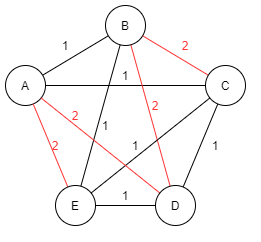
Graphe d'exemple pour le problème Gestion de tournées de livraison

Soit __Ich__ une instance du problème __Cycle Hamiltonien__, constitué du graphe G=(V,E).

Soit __Igtl__ une instance du problème de __Gestion de tournées de livraison__ définie par :
* Le graphe arête-valué G ’=(V, E(G)+E(G ̅), v : E(G )+E(G ̅) ↦ ℕ) avec v(u)=1 ∀ u ∈ E(G ) et v(u)=2 ∀ u ∈ E(G ̅)
* La liste de de sommet L=V
* L’entier k=|V |-1

Cette instance se construit en temps polynomial : Rechercher toutes les combinaisons de sommets de L non présentes dans G se fait en O(|V |²)

Supposons qu’il existe un algorithme résolvant le problème __Gestion de tournées de livraison__ en temps polynomial.

En appliquant cet algorithme sur __Igtl__ :
* Soit on obtient la réponse oui. Dans ce cas, on sait qu’il existe un cycle hamiltonien dans G. En effet, la solution de __Igtl__ est un cycle de longueur |V |-1 par construction de __Igtl__. Ce cycle ne peut passer que par des arêtes de G, puisque celles de G ̅ ont un cout de 2, la longueur de cette solution serait supérieure à |V |-1. Par ailleurs, cette solution ne passe qu’une seule fois par chaque sommet, car sinon sa longueur serait supérieure à |V |-1. De plus comme chacun des sommets du G se trouve dans la liste L et que ce cycle passe bien par chaque sommet de G, alors ce cycle passe par tous les sommets de la liste L. Ce cycle constitue donc un cycle hamiltonien dans G, la réponse à __Ich__ est donc oui.
* Symétriquement, si la réponse est non, on en déduit qu’il n’existe pas de cycle hamiltonien dans G, car sinon il constituerait une solution à __Igtl__ et la réponse serait oui.


On peut donc faire une réduction polynomial du problème __Cycle Hamiltonien__ vers le problème __Gestion de tournées de livraison__, ce qui prouve que __Gestion de tournées de livraison__ est au moins aussi difficile que __Cycle Hamiltonien__. Et comme on sait que __Cycle Hamiltonien__ est dans __NP-Complet__, alors on peut déterminer que __Gestion de tournées de livraison__ est dans __NP-Difficile__.

Enfin comme __Gestion de tournées de livraison__ se trouve à la fois dans __NP__ et dans __NP-Difficile__, peut en conclure qu’il se trouve à l’union des deux ensembles. Donc __Gestion de tournées de livraison__ se trouve dans __NP-Complet__.